### Визуализация данных

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

![Виды графиков.png](attachment:Виды графиков.png)
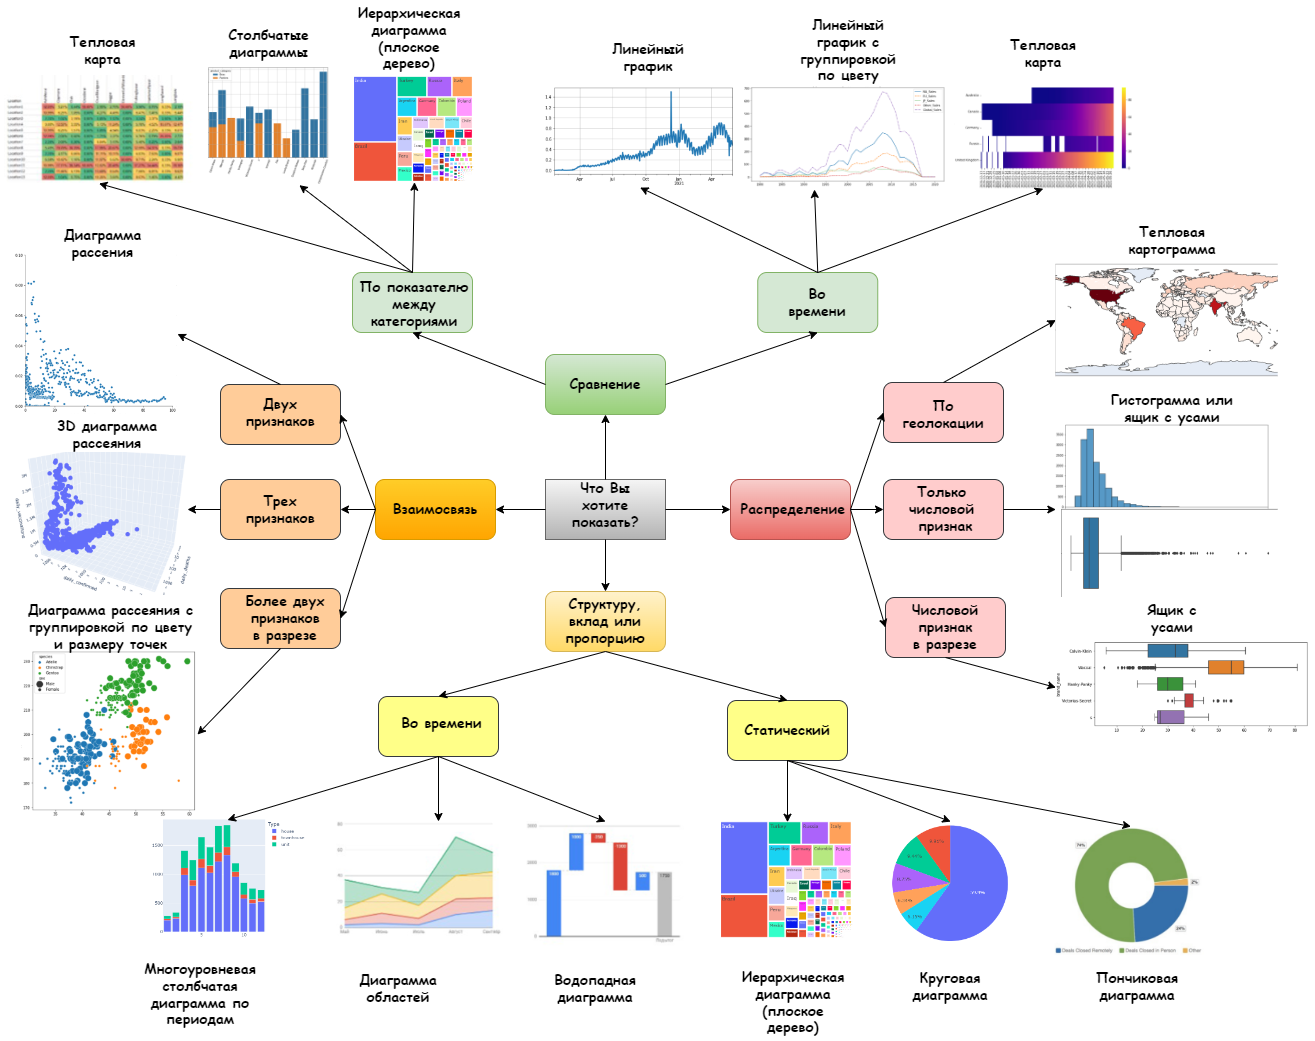

#### Линейный график (lineplot)

* Набор данных непрерывен (> 20 наблюдений), иначе — столбчатая диаграмма;
* Для сравнения > 7 рядов лучше уменьшить число категорий.

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN


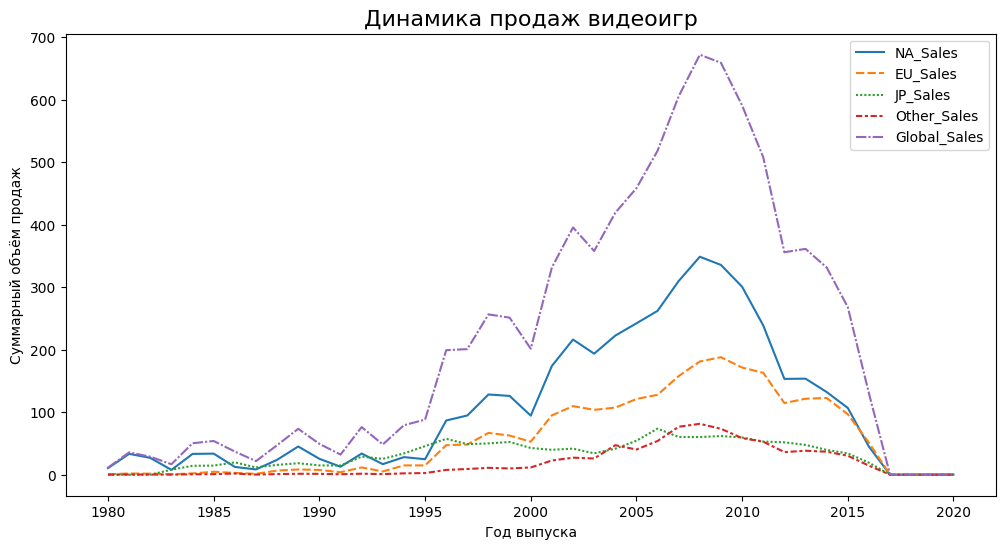

In [23]:
vg_data = pd.read_csv('data/video_games_sales.csv')
display(vg_data.head(2))

dinamic_by_region = vg_data[
        ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year_of_Release']
    ].groupby('Year_of_Release').sum()

fig = plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=dinamic_by_region)
lineplot.set_title('Динамика продаж видеоигр', fontsize=16)
lineplot.set_xlabel('Год выпуска')
lineplot.set_ylabel('Суммарный объём продаж');


#### Гистограмма (histogram)

* более 30 наблюдений (на практике > 100);
* Для сравнения параметров распределений по категориям -> коробчатая диаграмма;
* Для сравнения гистограмм между собой привести признаки к одной шкале + лучше использовать цветовую гистограмму;

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Coordinates
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,202.0,126.0,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,"-37.7996, 144.9984"
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,"-37.8079, 144.9934"


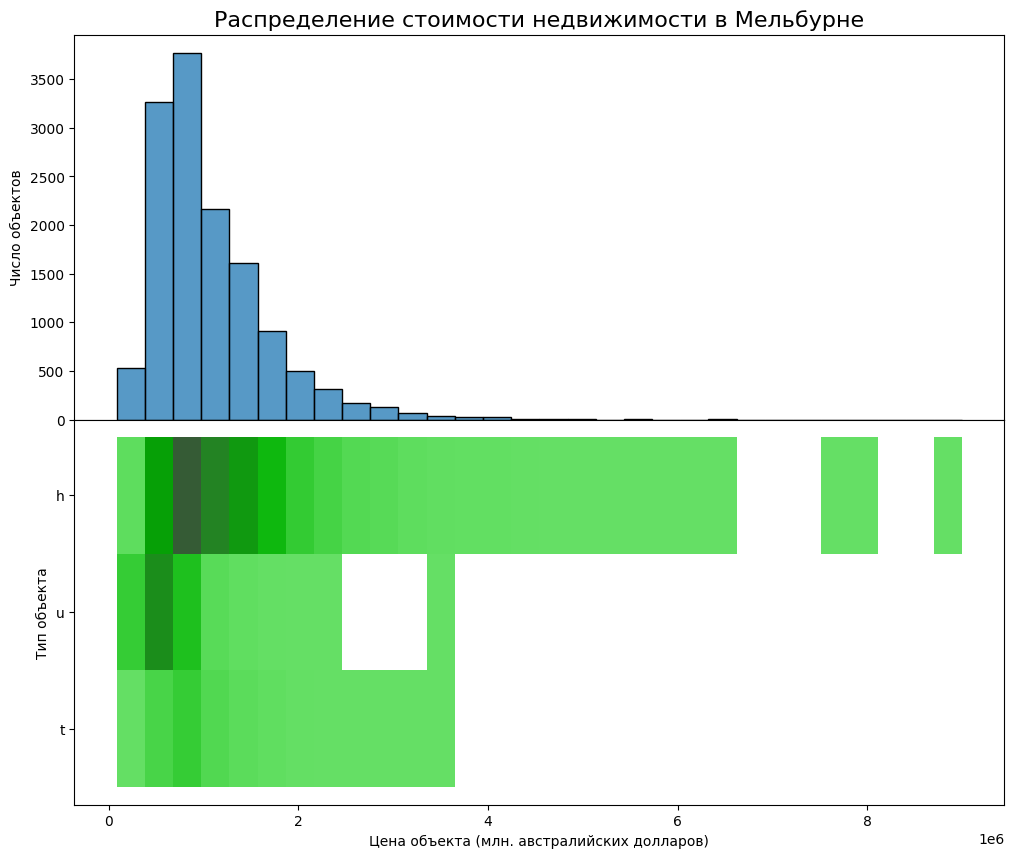

In [22]:
melb_data = pd.read_csv('data/melb_data.csv')
display(melb_data.head(2))

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=melb_data, 
    x='Price', 
    bins=30,
    ax=axes[0],
)
histplot1.set_title('Распределение стоимости недвижимости в Мельбурне', fontsize=16)
histplot1.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot1.set_ylabel('Число объектов')

histplot2 = sns.histplot(
    data=melb_data,
    x='Price',
    y='Type',
    bins=30,
    color='green',
    ax=axes[1]
)
histplot2.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot2.set_ylabel('Тип объекта');

#### Диаграмма рассеяния/точечная диаграмма (scatterplot)

* Большой набор данных (аналогично гистограмм);
* Не использовать расцветку и размер точек для признаков с большим числом уникальных категорий.
* Если не видна зависимость в данных, можно использовать логарифмическую шкалу по оси абсцисс (параметр log = True).

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female


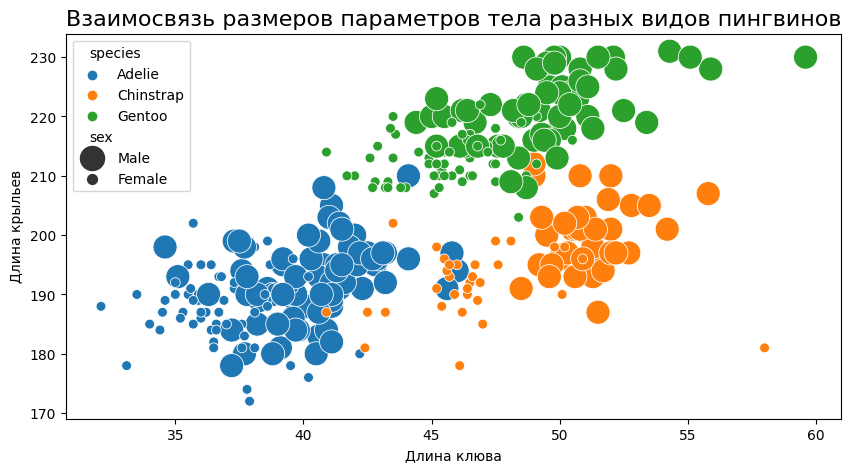

In [21]:
penguins_df = sns.load_dataset("penguins")
display(penguins_df.head(2))

fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=penguins_df,
    x='bill_length_mm',
    y='flipper_length_mm',
    hue='species',
    s=100,
    size='sex',
    sizes=(50, 300)

)
scatterplot.set_title('Взаимосвязь размеров параметров тела разных видов пингвинов', fontsize=16)
scatterplot.set_xlabel('Длина клюва')
scatterplot.set_ylabel('Длина крыльев');

#### Круговая диаграмма (pie chart)

* Сумма значений в круге всегда должна равняться единице, то есть всегда должно быть целое и его части;
* Не визуализировать секторы, близкие к 0;
* Не > 6-8 секторов. Если компонентов больше, выделить ТОП-6-8, а остальные - «прочие»;

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0


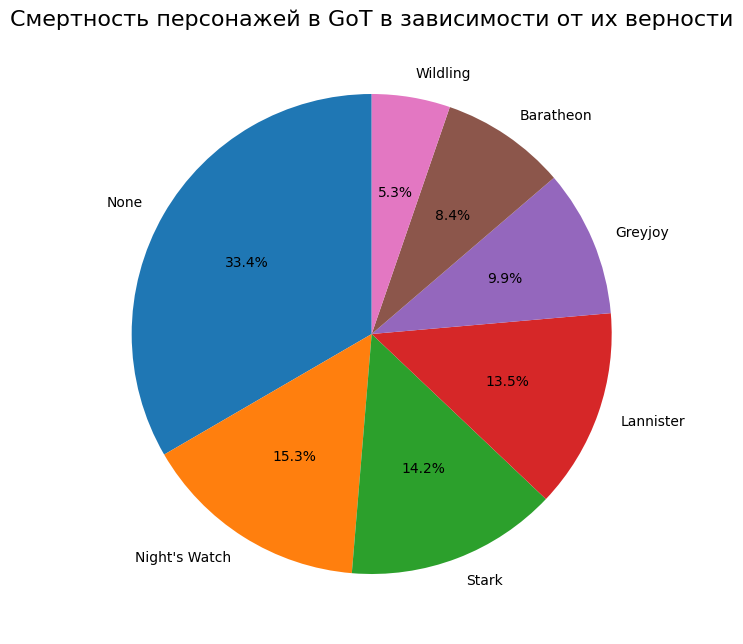

In [7]:
game_of_thrones_df = pd.read_csv('data/game_of_thrones/character-deaths.csv')
display(game_of_thrones_df.head(2))

game_of_thrones_df['Allegiances'] = game_of_thrones_df['Allegiances'].str.replace('House ', '')
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))
deaths_count = game_of_thrones_df['Allegiances'].value_counts().sort_values(ascending=False).head(7)
pie = ax.pie(
    deaths_count,
    labels=deaths_count.index,
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Смертность персонажей в GoT в зависимости от их верности', fontsize=16)
plt.show(pie)

#### Столбчатая диаграмма (bar chart)

* < 10 категорий;
* Если категорий много -> иерархическая диаграмма/отразить диаграмму горизонтально/объединить непопулярные категории в общую категорию «другие»;
* Если есть значения < 0 -> горизонтальная столбчатая диаграмма.

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,Calvin Klein Women's Sheer Marquisette Demi Un...,$36.00,$32.40,https://www.amazon.com/-/dp/B01NAVD98J?th=1&psc=1,Calvin-Klein,Bras,Amazon US,"An unlined demi cup bra featuring sheer, sexy ...",4.5,47,"[ 72% Nylon, 28% Elastane , Imported , hook an...","30B , 30C , 30D , 30DD , 32A , 32B , 32C , 32D...","30B , 30C , 30D , 30DD , 32B , 32C , 32D , 32D...",Bare
1,Wacoal Embrace Lace Bikini Panty,$27.00,$27.00,https://www.amazon.com/-/dp/B0011YQFNK?th=1&psc=1,Wacoal,Panties,Amazon US,Embrace lace bikini offers great fit and match...,4.4,91,"[ 100% Nylon , Imported , Hand Wash , 1.2"" hig...","Small , Medium , Large , X-Large","Small , Medium , X-Large",Large


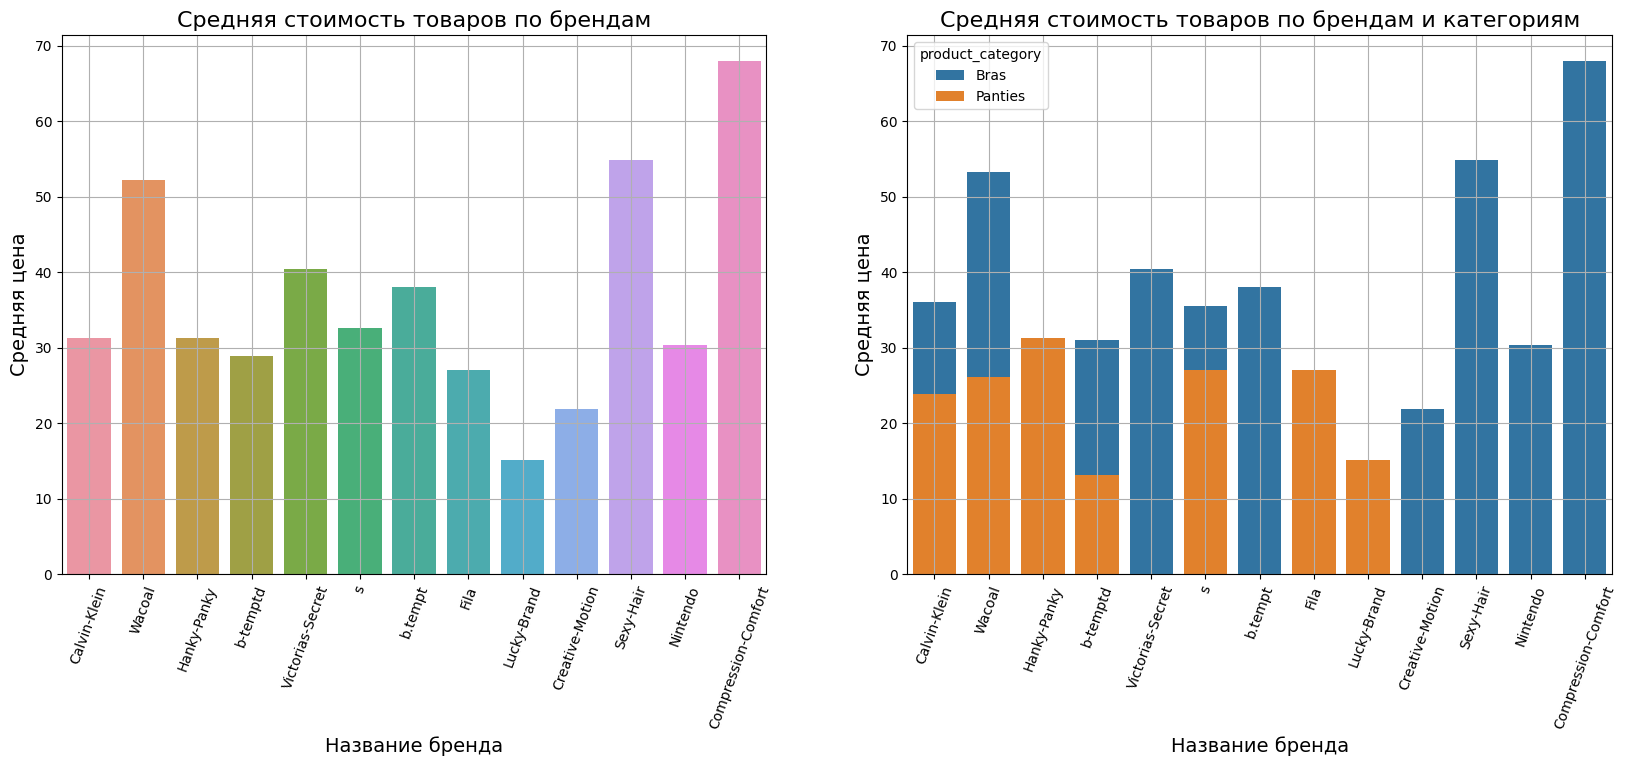

In [8]:
amazon_data = pd.read_csv('data/amazon_com.csv')
display(amazon_data.head(2))

def replace_url(brand_name):
    if 'ref=' in brand_name:
        if 'Calvin' in brand_name:
            return 'Calvin-Klein'
        elif 'Wacoal' in brand_name:
            return 'Wacoal'
        else:
            return 'b.tempt'
    else:
        return brand_name
    
amazon_data['brand_name'] = amazon_data['brand_name'].apply(replace_url);
amazon_data['price'] = amazon_data['price'].str.replace('$', '', regex=True).astype('float64');
amazon_data['brand_name'].unique();
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7));
barplot1 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    orient='v',
    ax = axes[0],
    ci=None
);
barplot1.tick_params(axis='x', rotation=70);
barplot1.set_title('Средняя стоимость товаров по брендам', fontsize=16);
barplot1.set_xlabel('Название бренда', fontsize=14);
barplot1.set_ylabel('Средняя цена', fontsize=14);
barplot1.grid();

barplot2 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    hue='product_category',
    orient='v',
    ax = axes[1],
    ci=None,
    dodge=False
);
barplot2.tick_params(axis='x', rotation=70);
barplot2.set_title('Средняя стоимость товаров по брендам и категориям', fontsize=16);
barplot2.set_xlabel('Название бренда', fontsize=14);
barplot2.set_ylabel('Средняя цена', fontsize=14);
barplot2.grid();

#### Тепловая карта (heatmap)

,id,username,date_utc,hour_utc,minute_utc,retweets
0,815422340540547073,realDonaldTrump,2017-01-01 05:00:10+00:00,5,0,27134
1,815930688889352192,realDonaldTrump,2017-01-02 14:40:10+00:00,14,40,23930


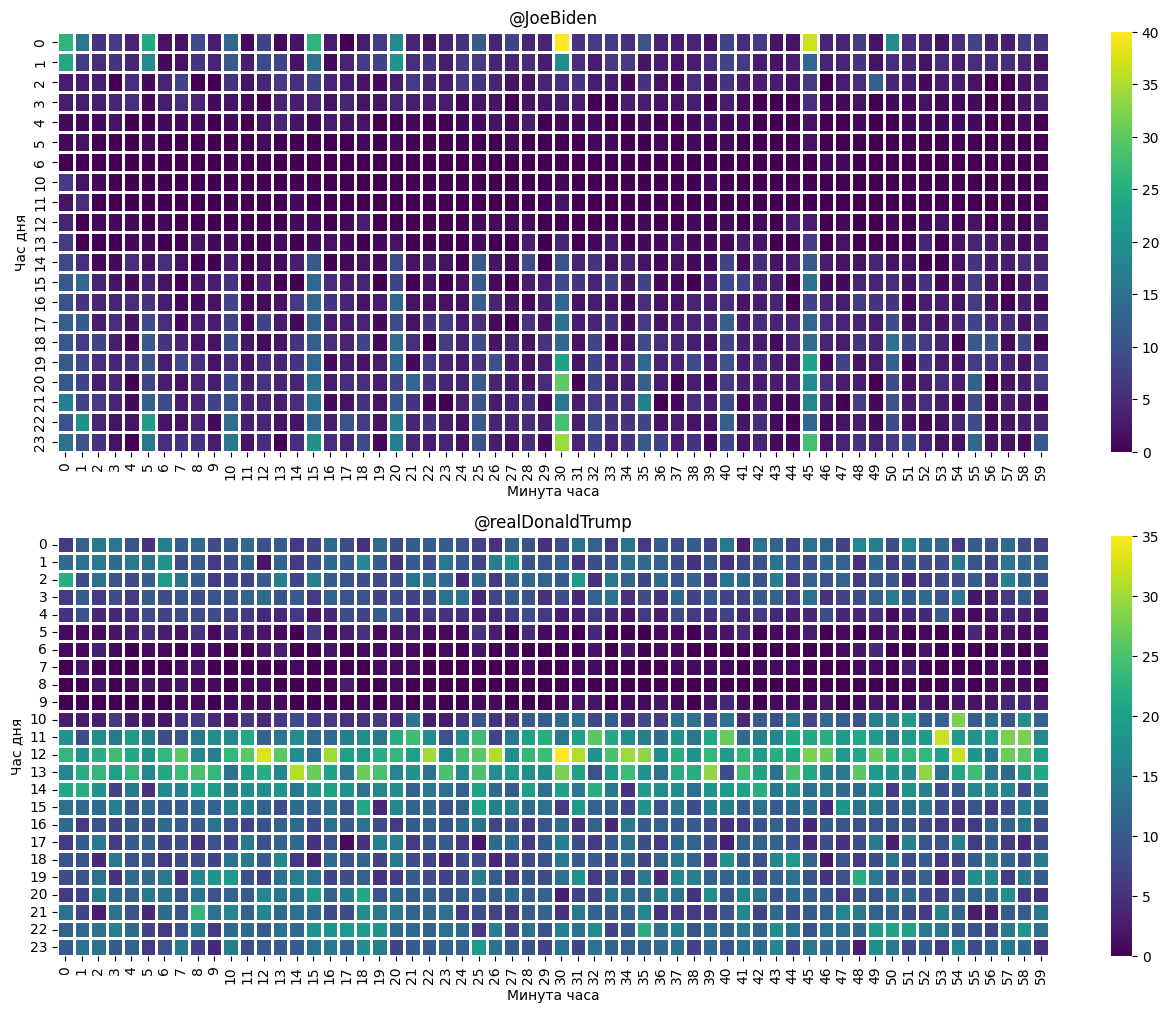

In [9]:
tweets_df = pd.read_csv("https://bit.ly/3cngqgL", 
                 parse_dates=['date_utc'], 
                 dtype={'hour_utc':int,'minute_utc':int,'id':str}
                )
display(tweets_df.head(2))

g = tweets_df.groupby(['hour_utc','minute_utc','username'])
tweet_cnt = g.id.nunique()
jb_tweet_cnt = tweet_cnt.loc[:,:,'JoeBiden'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
dt_tweet_cnt = tweet_cnt.loc[:,:,'realDonaldTrump'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
jb_heatmap = sns.heatmap(
    jb_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[0]
)
jb_heatmap.set_title('@JoeBiden');
jb_heatmap.set_xlabel('Минута часа');
jb_heatmap.set_ylabel('Час дня');

dt_heatmap = sns.heatmap(
    dt_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[1]
)

dt_heatmap.set_title('@realDonaldTrump');
dt_heatmap.set_xlabel('Минута часа');
dt_heatmap.set_ylabel('Час дня');

#### Коробчатая диаграмма (boxplot, box and whisker plot)

,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,2018-09-01 00:00:05.2690,2018-09-01 00:27:20.6340,252.0,MacDougal St & Washington Sq,40.732264,-73.998522,366.0,Clinton Ave & Myrtle Ave,40.693261,-73.968896,25577,Subscriber,1980,1
1,2018-09-01 00:00:11.2810,2018-09-01 00:02:23.4810,314.0,Cadman Plaza West & Montague St,40.693830,-73.990539,3242.0,Schermerhorn St & Court St,40.691029,-73.991834,34377,Subscriber,1969,0


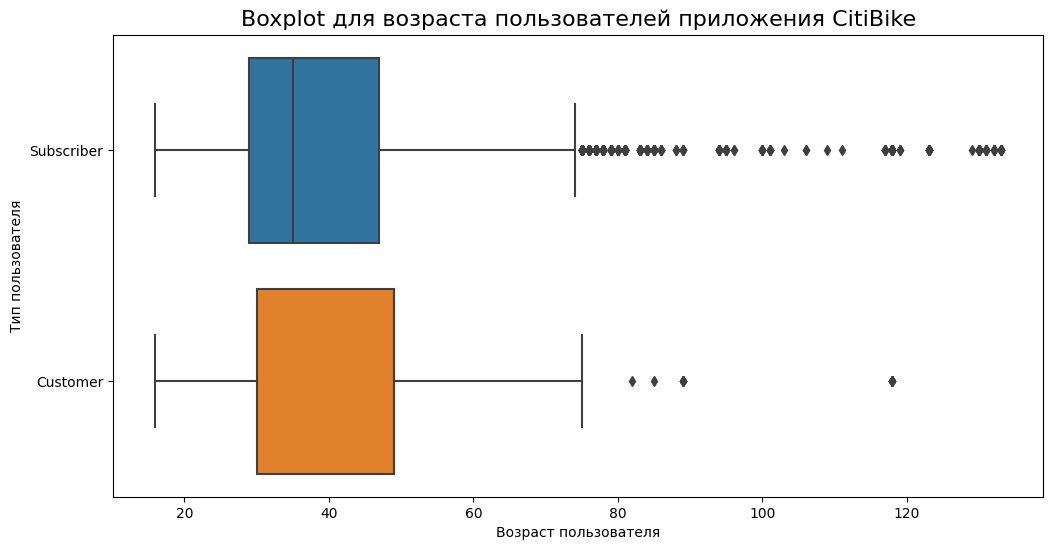

In [18]:
citibike_df = pd.read_csv('data/citibike-tripdata.csv')
display(citibike_df.head(2))
citibike_df['age'] = 2018 - citibike_df['birth year']

fig = plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(data=citibike_df, x='age', y='usertype')
boxplot.set_title('Boxplot для возраста пользователей приложения CitiBike', fontsize=16)
boxplot.set_xlabel('Возраст пользователя')
boxplot.set_ylabel('Тип пользователя');

#### Визуализация в Pandas

* **plot()**
    - **x** — название признака, который будет отложен по оси абсцисс;
    - **y** — название признака, который будет отложен по оси ординат;
    - **figsize** — размер графика (кортеж из ширины и высоты в дюймах);
    - **kind** —тип визуализации. Основные типы:
        - **'line** — линейный график (по умолчанию);
       - **'bar'** — столбчатая диаграмма;
       - **'barh'** — горизонтальная столбчатая диаграмма;
       - **'hist'** — гистограмма;
       - **'box'** — коробчатая диаграмма (boxplot);
       - **'pie'** — круговая диаграмма;
       - **'scatter'** — диаграмма рассеяния.
    - **grid** — отображение сетки (по умолчанию False);
    - **legend** — отображение легенды (по умолчанию False);
    - **title** — название графика;
    - **color** — цвет.

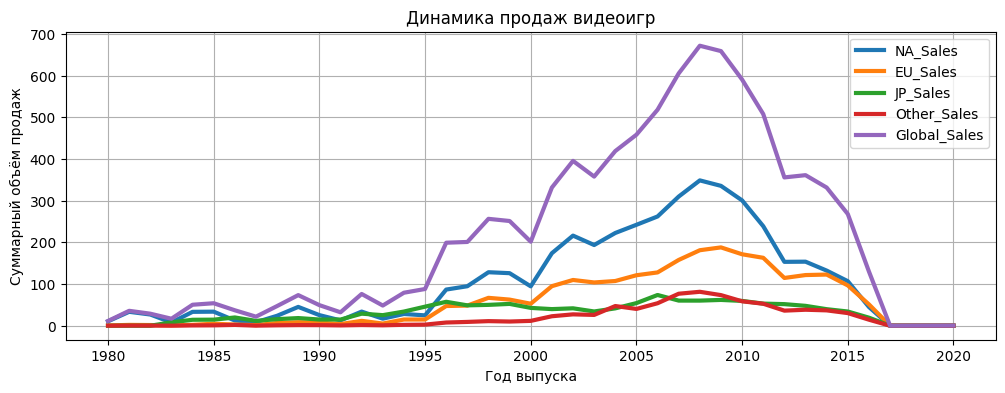

In [16]:
# Если в data передается dataframe, нужно указывать x и y
dinamic_by_region.plot(
    kind='line',
    figsize=(12, 4),
    title='Динамика продаж видеоигр',
    xlabel='Год выпуска',
    ylabel='Суммарный объём продаж',
    grid = True,
    lw=3
);

#### Визуализация в Matplotlib

* **plot()** - линейный график
    + **x, y** — последовательности, которые будут отложены по осям абсцисс и ординат;
    + **label** — заголовок для легенды;
    + **lw** — толщина линии.
* **scatter()** - диаграмма рассеяния
    + **x, y** — последовательности, которые будут отложены по осям абсцисс и ординат;
    + **s** — размер маркеров;
    + **marker** — вид маркеров ('o' — точки, '^' — треугольники);
    + **c** — цвет маркеров.
* **pie()** - круговая диаграмма
    + **x** — значения, по которым будет строиться круговая диаграмма;
    + **labels** — метки, соответствующие значениям;
    + **autopct** — формат отображения долей на диаграмме (например, '%.1f%%' означает, что округление будет производиться до первого знака после запятой и при выводе будет указан знак "%"; открывающий и закрывающий проценты означают форматирование, а внутренний — вывод знака "%");
    + **explode** — последовательность, которая определяет долю смещения сектора от центра для каждого значения из x.
* **bar()** - стобчатая диаграмма
    + **x** — названия категорий, которые будут располагаться по оси абсцисс;
    + **height** — высота столбцов диаграммы, массив из показателей для визуализации (например, среднее, максимальное значение и т. д.);
    + **width** — ширина столбцов диаграммы;
    + **color** — цвет.
* **hist()** - гистограмма
    + **x** — массив чисел, для которого строится гистограмма;
    + **bins** — число столбцов (корзин);
    + **orientation** — ориентация гистограммы (по умолчанию 'vertical');
    + **color** — цвет.

Доп.системы координат:
* **subplots()**, где
    + **nrows** — число строк;
    + **ncols** — число столбцов;
    + **figsize** — общий размер фигуры в дюймах (ширина и высота).

Добавление информативности:
* **axes.set_title()** — заголовок диаграммы, а также его настройки (например, параметр fontsize отвечает за размер шрифта);
* **axes.set_xlabel()** — название оси абсцисс;
* **axes.set_ylabel()** — название оси ординат;
* **axes.set_xticks()** — установка отметок на оси абсцисс;
* **axes.set_yticks()** — установка отметок на оси ординат;
* **axes.xaxis.set_tick_params()** — управление параметрами отметок на оси абсцисс (например, параметр rotation отвечает за поворот отметок в градусах);
* **axes.yaxis.set_tick_params()** — управление параметрами отметок на оси ординат;
* **axes.legend()** — отображение легенды;
* **axes.grid()** — установка сетки.

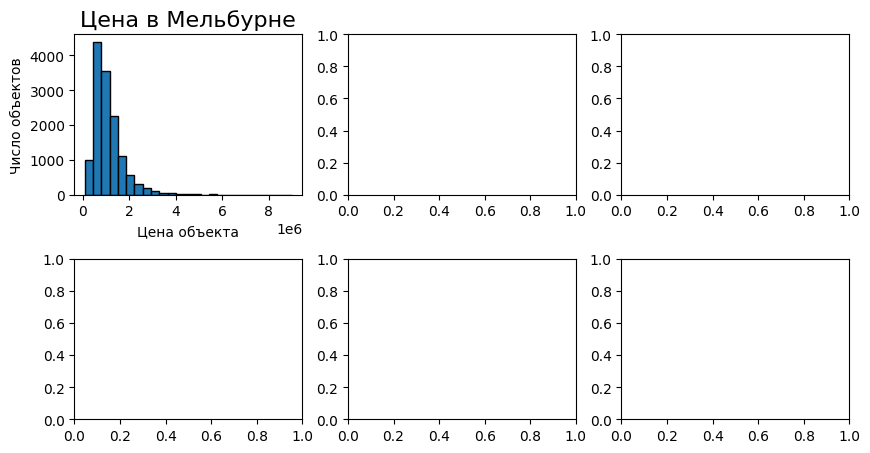

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
plt.subplots_adjust(hspace=.4)

axes[0][0].hist(
    melb_data['Price'], 
    bins=25,
    edgecolor='black'
)
axes[0][0].set_title('Цена в Мельбурне', fontsize=16)
axes[0][0].set_xlabel('Цена объекта')
axes[0][0].set_ylabel('Число объектов');

#### Визуализация в Seaborn

* **histplot()** - гистограмма
    + **data** — DataFrame, по которому строится график;
    + **x** — признак, который будет отложен по оси абсцисс;
    + **y** — признак, который будет отложен по оси ординат;
    + **hue** — группировочный категориальный признак, который позволяет строить отдельный график для каждой категории (не стоит использовать его для гистограмм, но он широко используется для других видов графиков в Seaborn);
    + **ax** — система координат Matplotlib, в которой строится график;
    + **color** — цвет графика;
    + **bins** — число столбцов в гистограмме (по умолчанию вычисляется автоматически с помощью специальных формул);
    + **kde**  — параметр, указывающий, стоит ли сглаживать гистограмму кривой (по умолчанию False).
* **boxplot()** - коробчатая диаграмма
    + **data**, **x**, **y** — см.выше;
    + **orient** - ориентация диаграммы; 
    + **width** — ширина коробок;
* **barplot()** - столбчатая диаграмма
    + **data**, **x**, **y** — см.выше;
    + **hue** - параметр для группировки по признаку; 
* **jointplot()** - диаграмма рассеяния + гистограмма
    + **data**, **x**, **y** — см.выше;
    + **xlim**, **ylim** - диапазон отображения осей x и y:
    + **height** - высота и ширина графика (он квадратный). 
* **heatmap()** - тепловая карта
    + **data**, **x**, **y** — см.выше;
    + **annot** - отображение легенды (аннотации);
    + **cmap** — цветовая гамма графика
     


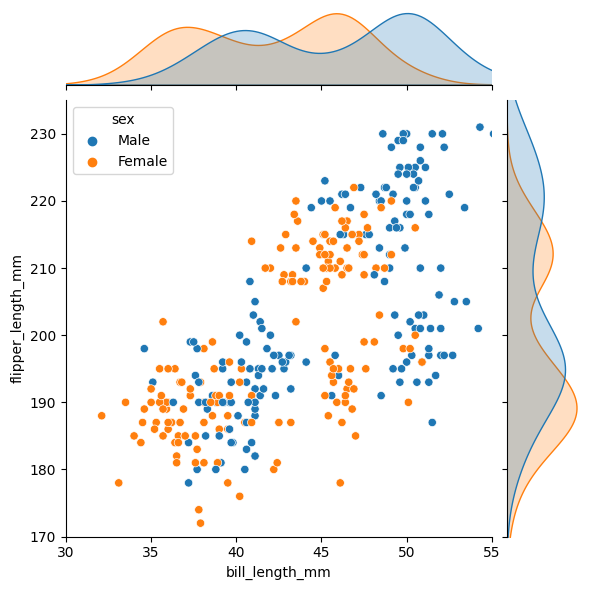

In [49]:
jointplot = sns.jointplot(
    data=penguins_df,
    x='bill_length_mm',
    y='flipper_length_mm',
    hue='sex',
    xlim = (30, 55),
    ylim = (170, 235),
    height=6,
);

### Визуализация в Plotly

* **line()** — линейные графики
    + **data_frame** — DataFrame, по которому строится график;
    + **x** — признак по оси абсцисс;
    + **y** — признак по оси ординат;
    + **height** — высота графика;
    + **width** — ширина графика;
    + **title** — название графика;
* **bar()** — столбчатые диаграммы
    + см. параметры line;
    + **color** - расцветка столбцов в зависимости от признака;

* **histogram()** — гистограммы;
* **scatter()** — диаграммы рассеяния;
* **box()** — коробчатые диаграммы;
* **pie()** — круговые диаграммы.

In [14]:
amazon_data_brands = amazon_data.groupby('brand_name', as_index=False).price.mean().round(2)

fig = px.bar(
    data_frame=amazon_data_brands,
    x='brand_name',
    y='price',
    title='Средняя стоимость по брендам',
    color='brand_name',
    text = 'price'
)
fig.show()
amazon_data_brands.shape

(13, 2)